<a href="https://colab.research.google.com/github/kim-slava/VKR/blob/main/last_vkr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os

In [ ]:

# Определим пути к данным
data_dir = '/content/drive/MyDrive/2'  # Укажите путь к вашему датасету

# Параметры
img_height, img_width = 2432, 2432
batch_size = 2


In [ ]:
# Загрузка данных
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='input',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='input',
    subset='validation'
)

Found 64 images belonging to 1 classes.
Found 16 images belonging to 1 classes.


In [ ]:

# Определение модели автоэнкодера
input_img = Input(shape=(img_height, img_width, 3))

# Кодировщик
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)

# # Декодировщик
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2432, 2432, 3)]   0         
                                                                 
 conv2d (Conv2D)             (None, 2432, 2432, 32)    896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 1216, 1216, 32)    0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 1216, 1216, 64)    18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 608, 608, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 608, 608, 128)     73856 

In [ ]:
# Обучение модели
epochs = 40

history = autoencoder.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/40
32/32 [==============================] - 122s 3s/step - loss: 0.0284 - val_loss: 0.0063
Epoch 2/40
32/32 [==============================] - 41s 1s/step - loss: 0.0048 - val_loss: 0.0031
Epoch 3/40
32/32 [==============================] - 37s 1s/step - loss: 0.0026 - val_loss: 0.0018
Epoch 4/40
32/32 [==============================] - 36s 1s/step - loss: 0.0016 - val_loss: 0.0012
Epoch 5/40
32/32 [==============================] - 37s 1s/step - loss: 0.0012 - val_loss: 0.0010
Epoch 6/40
32/32 [==============================] - 37s 1s/step - loss: 0.0010 - val_loss: 8.5442e-04
Epoch 7/40
32/32 [==============================] - 38s 1s/step - loss: 9.1450e-04 - val_loss: 8.4114e-04
Epoch 8/40
32/32 [==============================] - 37s 1s/step - loss: 7.8360e-04 - val_loss: 6.7248e-04
Epoch 9/40
32/32 [==============================] - 38s 1s/step - loss: 7.3394e-04 - val_loss: 6.1475e-04
Epoch 10/40
32/32 [==============================] - 41s 1s/step - loss: 6.4540e-04 - val

In [ ]:
# Обучение модели
epochs = 20

history1 = autoencoder.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

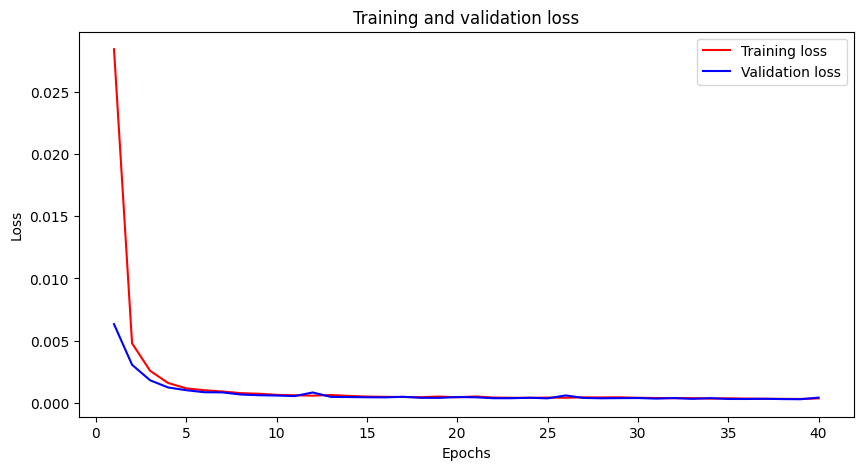

In [ ]:
import matplotlib.pyplot as plt
# Функция для построения графиков обучения
def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Построение графиков обучения
plot_training_history(history)

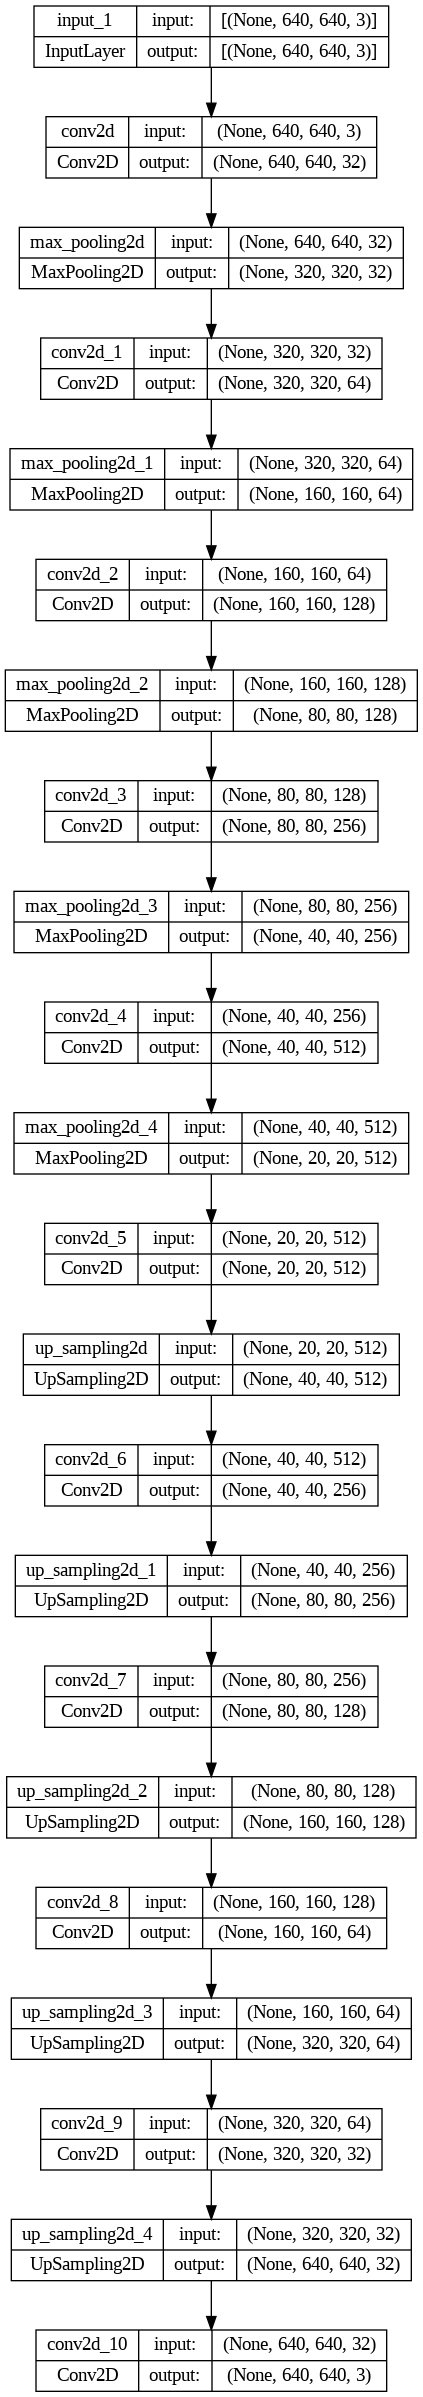

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Сохранение модели
autoencoder.save('autoencoder_anomaly_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 6s 6s/step


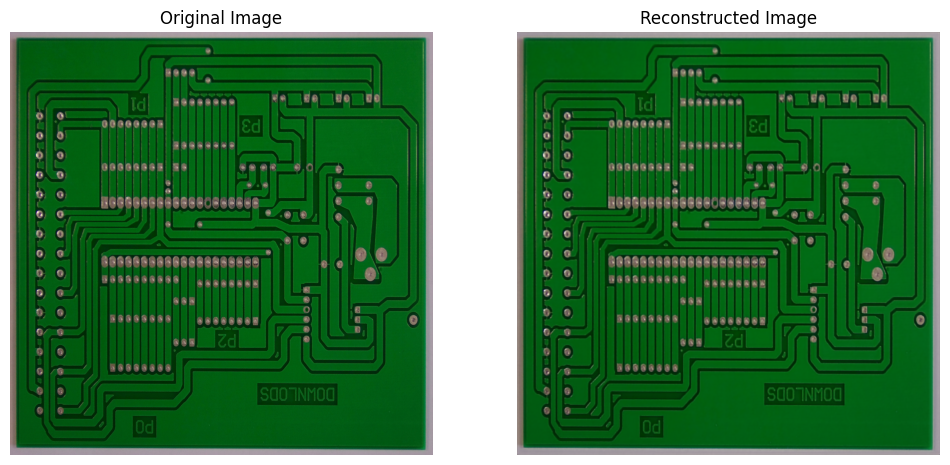

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Функция для загрузки и обработки изображения
def load_and_process_image(image_path, model):
    img = image.load_img(image_path, target_size=(2432, 2432))
    img = image.img_to_array(img)
    img = img / 255.0  # Нормализация
    img = np.expand_dims(img, axis=0)  # Добавление размерности пакета
    reconstructed_img = model.predict(img)  # Восстановление изображения с помощью модели
    return img[0], reconstructed_img[0]

# Путь к изображению
image_path = '/content/drive/MyDrive/04_missing_hole_01.jpg'

# Загрузка и обработка изображения
original_image, reconstructed_image = load_and_process_image(image_path, autoencoder)

# Функция для отображения изображения и его восстановленной версии
def plot_original_and_reconstructed(original, reconstructed):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed)
    plt.title('Reconstructed Image')
    plt.axis('off')

    plt.show()

# Отображение изображения и его восстановленной версии
plot_original_and_reconstructed(original_image, reconstructed_image)

1/1 [==============================] - 0s 166ms/step


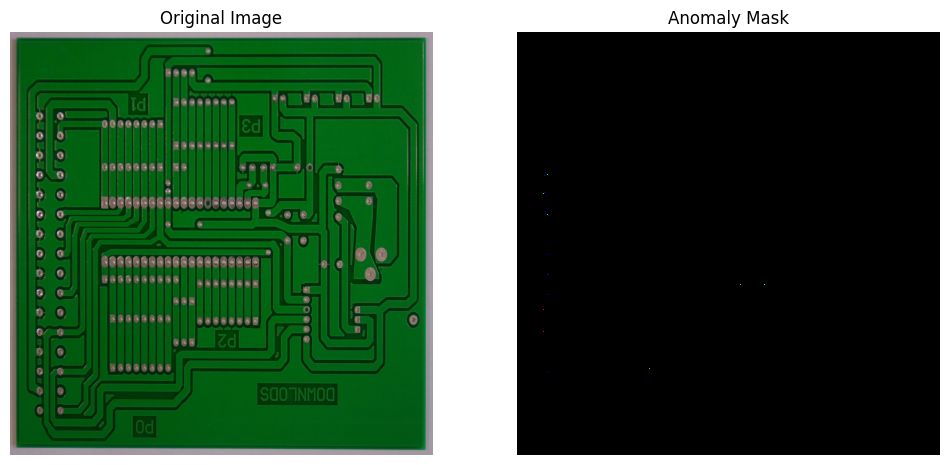

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
# Функция для загрузки и обработки изображения
def load_and_process_image(image_path, model):
    img = image.load_img(image_path, target_size=(2432, 2432))
    img = image.img_to_array(img)
    img = img.astype('float32')  # Явное преобразование к типу float32
    img = img / 255.0  # Нормализация
    img = np.expand_dims(img, axis=0)  # Добавление размерности пакета
    reconstructed_img = model.predict(img)  # Восстановление изображения с помощью модели
    return img[0], reconstructed_img[0]

# Функция для выявления аномалий на изображении
def detect_anomalies(original, reconstructed, threshold):
    difference = np.abs(original - reconstructed)
    anomaly_mask = difference > threshold
    return anomaly_mask

# Функция для отображения аномалий
def plot_anomalies(original, anomaly_mask):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(anomaly_mask.astype(np.float32), cmap='Reds', interpolation='nearest')
    plt.title('Anomaly Mask')
    plt.axis('off')

    plt.show()

# Путь к изображению
image_path = "/content/drive/MyDrive/04_missing_hole_01.jpg"

# Загрузка модели автоэнкодера
autoencoder = load_model("/content/autoencoder_anomaly_detection.h5")
# Загрузка и обработка изображения
original_image, reconstructed_image = load_and_process_image(image_path, autoencoder)

# Задание порога для определения аномалий
threshold = 0.2  # Пример значения порога, может потребоваться настройка в зависимости от данных

# Выявление аномалий на изображении
anomaly_mask = detect_anomalies(original_image, reconstructed_image, threshold)

# Отображение аномалий на изображении
plot_anomalies(original_image, anomaly_mask)